# Analysis of Fandango's Movie Ratings System


<p style="text-align:center;">
  <img src="https://fivethirtyeight.com/wp-content/uploads/2015/10/fandango_lede_revise.png?w=575" width="500" height="100">
  <br>
  Source: <a href="https://fivethirtyeight.com/features/fandango-movies-ratings/">FiveThirtyEight</a>
</p>


In this project, we will be analyzing movie ratings data from Fandango, an online movie ratings aggregator. Our goal is to determine whether there has been any change in Fandango's rating system after a data journalist named Walt Hickey found strong evidence to suggest that the rating system was biased and dishonest in 2015. We will use more recent movie ratings data to determine if Fandango has made any improvements to its rating system since [Hickey's analysis](https://fivethirtyeight.com/features/fandango-movies-ratings/). By performing this analysis, we aim to gain insight into the accuracy and fairness of Fandango's movie ratings.

## Project and Data Overview

One effective way to determine if there has been any changes in Fandango's rating system since Walt Hickey's analysis is by comparing the system's features before and after the analysis. Luckily, we have access to the necessary data for both periods of time:

- Walt Hickey made the data from his analysis publicly accessible on GitHub [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/fandango). This data will be used to analyze Fandango's rating system prior to Hickey's analysis.
- A team member from Dataquest has collected movie rating data for films released in 2016 and 2017. This data is available on GitHub [Movie_ratings_2016_17](https://github.com/mircealex/Movie_ratings_2016_17) and will be used to analyze the features of Fandango's rating system after Hickey's analysis.

## Understanding the Data

Let's start by importing the necessary libraries, then proceed to read in both datasets.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100  # Avoid having displayed truncated output
%matplotlib inline

In [2]:
# Read both datasets
previous = pd.read_csv('fandango_score_comparison.csv')
after = pd.read_csv('movie_ratings_16_17.csv')

In [3]:
# Display first few rows of both datasets
display(previous.head())
display(after.head())

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


Display the column information of both datasets.

In [4]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
after.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


We briefly analyzing two dataframes: `previous` and `after`. The `previous` dataframe contains information on films released prior to 2016, while the `after` dataframe contains information on films released in 2016 and 2017.

The `previous` dataframe has 146 entries and a total of 22 columns. The columns include the film title, ratings from Rotten Tomatoes, Metacritic, IMDb, and Fandango, as well as normalized ratings (rescaled to five-star rating scale) and vote counts.

The `after` dataframe has 214 entries and a total of 15 columns. The columns include the movie title, year of release, ratings from Metacritic, IMDb, Rotten Tomatoes, and Fandango, as well as normalized ratings and audience ratings.

Both dataframes have non-null values in all columns. However, to make our analysis easier, we will isolate the relevant columns into separate variables. For the `previous` dataframe, we will select the following columns: `'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'`. For the `after` dataframe, we will select the following columns: `'movie', 'year', 'fandango'`.

In [6]:
# Create subset of new dataframes based on the relevant columns
fandango_previous = previous[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = after[['movie', 'year', 'fandango']].copy()

# View results
display(fandango_previous.head())
display(fandango_after.head())

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Let's define the columns used in `fandango_previous` and `fandango_after`:

**fandango_previous**
- `FILM`: The film in question
- `Fandango_Stars`: The number of stars the film had on its Fandango movie page
- `Fandango_Ratingvalue`: The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained
- `Fandango_votes`: The number of user votes the film had on Fandango
- `Fandango_Difference`: The difference between the presented *Fandango_Stars* and the actual *Fandango_Ratingvalue*

**fandango_after**
- `movie`: 	The name of the movie
- `year`: The release year of the movie
- `fandango`: The Fandango rating of the movie (user score)

In order to determine whether Fandango's movie rating system had changed following the analysis conducted by Walt Hickey, we need to sample the population of all movie ratings on Fandango's website at two different points in time: before and after the analysis. The goal is to compare the parameters of the population at these two points in time.

To ensure that the samples are representative of the population, we need to make sure that the sampling method is unbiased. However, it appears that the samples used by Walt Hickey and Mircea (Alex) Suciu are not random, but rather purposive.

Walt Hickey's sample, which was taken in August 2015, only included movies that met the following criteria:

- had at least 30 fan ratings on Fandango's website at the time of sampling
- had tickets on sale in 2015

This sample is subject to *temporal trends* (e.g., movies in 2015 might have been outstandingly good or bad compared to other years). Moreover, this sample is not representative of the population of interest, as it does not include movies with fewer than 30 fan ratings, or those without tickets on sale in 2015. Therefore, it's unclear whether any conclusions drawn from this sample can be generalized to the larger population.

Mircea (Alex) Suciu's sample, on the other hand, was taken in 2016 and only included movies that met the following criteria:

- were released in 2016 or later
- had a considerable number of votes and reviews (exact number is not specified)

While this sample is also subject to temporal trends, it is unclear whether it is representative of the population of interest. It is possible that movies released after 2016 might have different characteristics that are not captured in this sample.

It's worth noting that both authors used [purposive sampling](https://youtu.be/JoE_BBiPYEs), which is a non-random sampling method where the researcher selects a sample that fits their research question. While this method is useful for answering specific research questions, it's not well-suited for making generalizations about a population.

Overall, the samples used by Walt Hickey and Mircea (Alex) Suciu might not be representative of the population of interest, and as such, it's unclear whether any conclusions drawn from these samples can be generalized to the larger population.

## Changing the Goal of our Analysis

We are presented with two options at this point: collect new data or adjust the goal of our analysis to work with the existing data. Collecting new data can be time-consuming, and it is currently almost impossible to collect a new sample from before Hickey's analysis.

Therefore, it may be more efficient to modify our goal by imposing some limitations on it. Instead of trying to investigate if Fandango's rating system has changed following Hickey's analysis, our new objective is to determine if there are any variations in Fandango's ratings for popular movies in 2015 and 2016. This adjusted goal can be a good approximation of our original goal and is likely to be accomplished using the existing data.

## Isolating the Samples We Need

Our new goal is to compare Fandango's ratings for popular movies in 2015 with those in 2016. To achieve this, we need to define the term "popular" with precision. Following Hickey's benchmark, we will consider a movie as "popular" only if it has 30 or more fan ratings on Fandango's website. With this in mind, we can identify two populations of interest that we want to describe and compare:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

By focusing on popular movies, we can ensure that our samples are representative of the target audience that is likely to use Fandango's rating system. The next step is to explore the characteristics of these two populations and compare them to see if there is any difference between the ratings for popular movies in 2015 and 2016.

In our second sample (`fandango_after`), movie popularity is one of the sampling criteria, but it does not provide information about the number of fan ratings. Thus, we need to be cautious and investigate whether this sample truly represents popular movies, i.e., movies with over 30 fan ratings. The lack of information about the number of fan ratings in the sample raises concerns about its representativeness and the accuracy of the conclusions drawn from it.

One way to assess the representativeness of this sample is by randomly selecting 10 movies from it and checking the number of fan ratings on Fandango's website. Ideally, at least 8 out of the 10 movies should have 30 or more fan ratings. This approach would help us validate the accuracy of the sample and gain more insights about its representativeness. By doing so, we can determine if the sample accurately represents the population of interest and can be used to draw meaningful conclusions.

In [7]:
fandango_after.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In our previous step, we utilized a random seed value of 1. Using a fixed seed value is a good practice in sampling because it suggests that we did not manipulate the random seed to achieve a desired sample outcome. By using a fixed seed value, we eliminate any potential for bias in the sample selection process.

As of April 2018, the following are the fan ratings that have been obtained:

| Movie                                     | Fan rating |
| ----------------------------------------- | ---------- |
| Mechanic: Resurrection                    | 2247       |
| Warcraft                                  | 7271       |
| Max Steel                                 | 493        |
| Me Before You                             | 5263       |
| Fantastic Beasts and Where to Find Them   | 13400      |
| Cell                                      | 17         |
| Genius                                    | 127        |
| Sully                                     | 11877      |
| A Hologram for the King                   | 500        |
| Captain America: Civil War                | 35057      |

90% of the movies in our sample are popular. This is enough for us to move forward with a bit more confidence.

Let's also double-check the other dataset (`fandango_previous`) for popular movies. The documentation states clearly that there are only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here. As previously mentioned, the column `Fandango_votes` refers to the number of user votes a film received on Fandango.

In [8]:
sum(fandango_previous['Fandango_votes'] < 30)

0

Upon inspecting the two datasets, it's apparent that some movies have a release year that is not 2015 or 2016. To ensure that our analysis is based on the intended criteria, we will need to filter the movies and only include those that were released in 2015 and 2016.

We will begin with Hickey's dataset and filter out the movies released in 2015. While there is no separate column for the release year, we can extract the information from the `FILM` column's strings.

In [9]:
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [10]:
fandango_previous['Year'] = fandango_previous['FILM'].str[-5:-1]
fandango_previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


Let's examine the frequency distribution of the `Year` column to identify the number of movies released in each year, and then isolate only the movies released in 2015 for further analysis.

In [11]:
fandango_previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_2015 = fandango_previous[fandango_previous['Year'] == '2015']
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

Excellent! We can now proceed to isolate the movies in the other dataset.

In [13]:
fandango_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [14]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [15]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

Now that we have completed the preliminary steps, we can proceed to analyze the two previously isolated samples. Our aim remains to find out if there are any noticeable differences between the ratings given by Fandango for popular movies in 2015 and those for popular movies in 2016.

While there are various methods of performing the analysis, let's begin with a simple comparison of the distributions' shapes for both samples at a higher level.

In [16]:
display(fandango_2015.head(1))
display(fandango_2016.head(1))

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015


,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5


In [17]:
fandango_2015.Fandango_Stars.value_counts()

4.5    49
4.0    37
3.5    23
3.0    11
5.0     9
Name: Fandango_Stars, dtype: int64

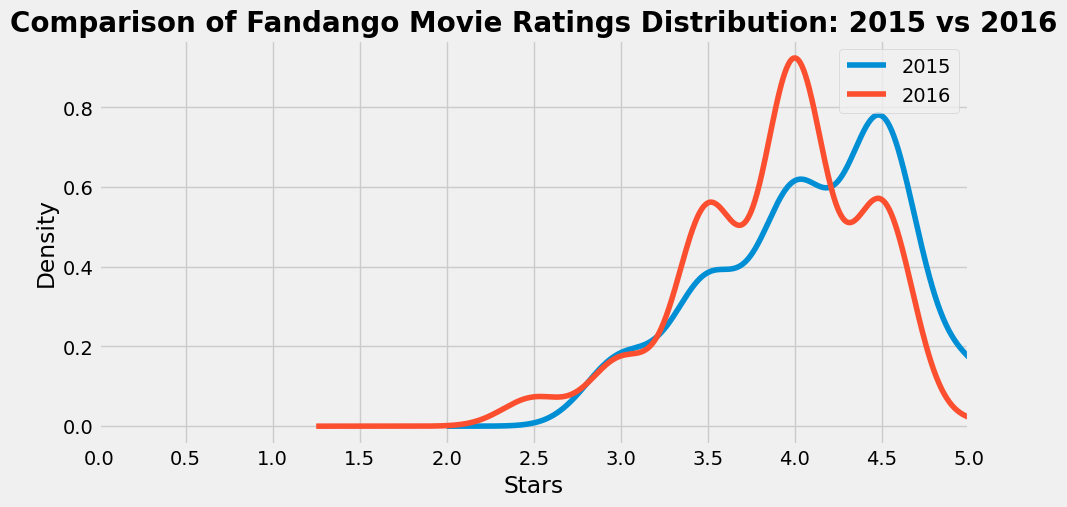

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 5))

fandango_2015['Fandango_Stars'].plot.kde(label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)


plt.title('Comparison of Fandango Movie Ratings Distribution: 2015 vs 2016',
          size=20, weight='bold')
plt.xlabel('Stars')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5.1, .5))

plt.show()

The graph above reveals two key observations:

- Both distributions are strongly left-skewed.
- The 2016 distribution is slightly shifted to the left compared to the 2015 distribution.

The left-skew indicates that Fandango's movie ratings are mostly high and very high, which is questionable given that Fandango sells movie tickets. Further investigation is needed to verify this claim — ideally it would be best to investigate this further in a separate project as it is not relevant to our current analysis goal.

The slight left shift of the 2016 distribution is significant for our analysis. It demonstrates that movie ratings were a little lower in 2016 than in 2015, indicating a potential difference between Fandango's ratings for popular movies in 2015 and those in 2016. We can also determine the direction of the difference: the ratings in 2016 were slightly lower than those in 2015.

## Comparing Relative Frequencies

The above kernel density plots show a clear difference between the two distributions. While they were helpful in comparing the distributions, we now need to delve into more specific information. One approach is to analyze the frequency tables of the two distributions and examine the numbers.

However, since the datasets contain a different number of movies, we need to normalize the tables and express the values in percentages instead.

In [19]:
print('2015 ratings distribution')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015 ratings distribution


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [20]:
print('2016 ratings distribution')
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016 ratings distribution


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

The analysis of the frequency tables shows the following:

- Very high ratings (4.5 and 5 stars) had significantly lower percentages in 2016 than in 2015.
- In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%.
- Ratings of 4.5 were more popular in 2015, with approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.
- The difference between the two frequency distributions is also reflected in the minimum ratings, with 2016 having a lower minimum rating of 2.5 stars compared to 2015's minimum of 3 stars.

Additionally,

- For some other ratings, the percentage went up in 2016.
- There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015.
- 3.5 and 4.0 are high ratings, and this challenges the direction of the change seen on the kernel density plots.

## Determining the Direction of the Change

To better understand the direction of the difference between the two distributions, we will calculate summary statistics. This will give us a more precise picture of the direction, which is not as clear as it was on the kernel density plots. We will calculate the mean, median, and mode for each distribution of movie ratings and compare these statistics. Additionally, we will generate a grouped bar plot to visually compare how the mean, median, and mode varied between 2015 and 2016.

In [21]:
# Fandango movies 2015
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # returns series therefore, we want to extract the value at index 0

# Fandango movies 2016
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

# Store the above values in the dataframe
stats_df = pd.DataFrame({'2015': [mean_2015, median_2015, mode_2015],
                         '2016': [mean_2016, median_2016, mode_2016]},
                         index=['mean', 'median', 'mode'])
stats_df

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


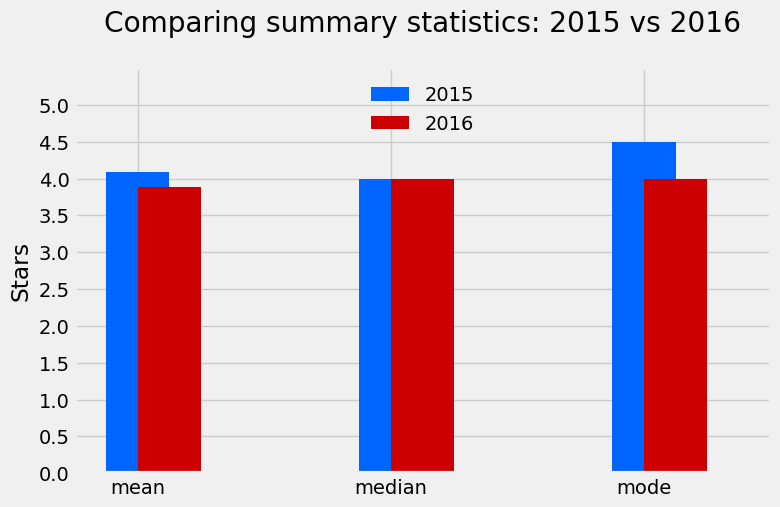

In [22]:
# Visualize the summary statistics using bar plot
plt.figure(figsize=(8, 5))
stats_df['2015'].plot.bar(color='#0066ff', align='center', label='2015', width=.25)
stats_df['2016'].plot.bar(color='#cc0000', align='edge', label='2016', width=.25, rot=0)
plt.title('Comparing summary statistics: 2015 vs 2016', y=1.07)
plt.ylabel('Stars')
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.legend(loc='upper center', framealpha = 0)

plt.show()

In 2016, the mean rating was lower by around 0.2 compared to 2015. This corresponds to a decrease of nearly 5% relative to the mean rating in 2015.

In [23]:
pct_dec = (stats_df.loc['mean'][0] - stats_df.loc['mean'][1]) / stats_df.loc['mean'][0] * 100
print(f'Ratings in 2015 decreased by {round(pct_dec)}%.')

Ratings in 2015 decreased by 5%.


The mode for 2016 is 0.5 lower than that of 2015, while the median is the same. This, combined with the mean, confirms that popular movies released in 2016 were rated slightly lower on average than those released in 2015, confirming the direction of the change observed on the kernel density plot.

## Conclusion

Our analysis revealed that there is a noticeable difference between the ratings of popular movies on Fandango in 2015 and 2016. Specifically, the average ratings of popular movies in 2016 were lower compared to those in 2015. These findings confirm a suspicious trend identified by Hickey, suggesting that Fandango's rating system was biased towards higher ratings, and that the ratings for popular movies in 2015 were artificially inflated.

However, it's challenging to establish with certainty what caused the change. While the observed drop in ratings could indicate that Fandango has fixed the rating system, other potential factors such as differences in the quality of movies or audience preferences could also contribute to the difference. Therefore, further research and analysis would be needed to determine the cause of the observed difference in ratings.